# camera.py

In [1]:
%%writefile camera.py
import time

import cv2

pic_num = 30
root = ("../face_pic/")
bool_break = 0
#웹캠에서 영상을 읽어온다
cap = cv2.VideoCapture(0)
cap.set(3, 640) #WIDTH
cap.set(4, 480) #HEIGHT

#얼굴 인식 캐스케이드 파일 읽는다
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
i = 0
while(True):
    # frame 별로 capture 한다
    ret, frame = cap.read()
    faces = face_cascade.detectMultiScale(frame, 1.3, 5)
    frame_c = frame.copy()
    # 인식된 얼굴에 사각형을 출력한다
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x-40,y-40),(x+w+40,y+h+40),(255,0,0),2)
        # cropping & save
        face = frame_c[y-30:y+h+30,x-30:x+w+30]
        cv2.imwrite(root+str(i)+".jpg",face)
        i += 1
        time.sleep(0.5)
        if i == pic_num:
            bool_break = 1
            break        
    cv2.imshow('frame',frame)
    if bool_break == 1:
        break
    
    if cv2.waitKey(100) & 0xFF == ord('q'):               
        break
    
cap.release()
cv2.destroyAllWindows()


Overwriting camera.py


In [ ]:
# Face recognition

In [3]:
from keras import models
from keras import layers
from keras.applications import VGG16

Using TensorFlow backend.


In [4]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape =(200,200,3))
conv_base.trainable = False

In [84]:

face_recogn = models.Sequential()
# face_recogn.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
# face_recogn.add(layers.MaxPooling2D((2,2)))
# face_recogn.add(layers.Conv2D(32,(3,3),activation='relu'))
# face_recogn.add(layers.MaxPooling2D((2,2)))                
# face_recogn.add(layers.Conv2D(64,(3,3),activation='relu'))
# face_recogn.add(layers.MaxPooling2D((2,2)))                
face_recogn.add(layers.Input(shape=(200,200,3)))
face_recogn.add(conv_base)
face_recogn.add(layers.Flatten())
face_recogn.add(layers.Dense(64,activation='relu'))
face_recogn.add(layers.Dense(32,activation='relu'))
face_recogn.add(layers.Dense(3,activation='softmax'))

TypeError: The added layer must be an instance of class Layer. Found: Tensor("input_4:0", shape=(None, 200, 200, 3), dtype=float32)

In [6]:
face_recogn.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['acc'])

face_recogn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 15,896,579
Trainable params: 1,181,891
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [7]:
pic_root = ("../face_pic/")

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range = 15, horizontal_flip=True)
# test_datagem = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(pic_root,target_size=(200,200),batch_size=16,interpolation="bilinear")
# test_generator = train_datagen.flow_from_directory(test_root,target_size=(200,200,3),batch_size=16,interpolation="bilinear")

Found 87 images belonging to 3 classes.


In [11]:
import matplotlib.pyplot as plt
import numpy as np

Found 87 images belonging to 3 classes.


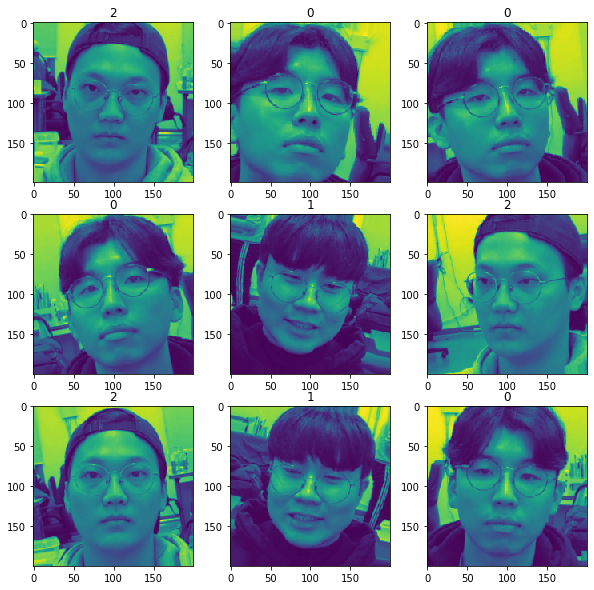

In [13]:
i = 0
plt.figure(figsize=(10, 10))
for x_batch, y_batch in train_datagen.flow_from_directory(pic_root,target_size=(200,200),batch_size=16,color_mode='grayscale'):
    while i < 9:
        plt.subplot(3, 3, 1+i)
        plt.title(np.argmax(y_batch[i]))
        plt.imshow(x_batch[i].reshape(200, 200))
        i += 1
    break
    
plt.show()

In [14]:
first = face_recogn.fit_generator(train_generator,steps_per_epoch=10,epochs=10)

Epoch 1/10
10/10 [==============================] - 80s 8s/step - loss: 1.2327 - acc: 0.7183
Epoch 2/10
10/10 [==============================] - 82s 8s/step - loss: 0.0276 - acc: 1.0000
Epoch 3/10
10/10 [==============================] - 76s 8s/step - loss: 0.0120 - acc: 1.0000
Epoch 4/10
10/10 [==============================] - 76s 8s/step - loss: 0.0068 - acc: 1.0000
Epoch 5/10
10/10 [==============================] - 81s 8s/step - loss: 0.0032 - acc: 1.0000
Epoch 6/10
10/10 [==============================] - 76s 8s/step - loss: 0.0029 - acc: 1.0000
Epoch 7/10
10/10 [==============================] - 81s 8s/step - loss: 8.4915e-04 - acc: 1.0000
Epoch 8/10
10/10 [==============================] - 77s 8s/step - loss: 4.9955e-04 - acc: 1.0000
Epoch 9/10
10/10 [==============================] - 76s 8s/step - loss: 1.8059e-04 - acc: 1.0000
Epoch 10/10
10/10 [==============================] - 76s 8s/step - loss: 0.1954 - acc: 0.9225


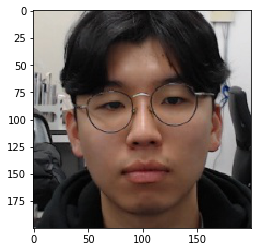

In [33]:
from keras.preprocessing import image
img_path = "../face_pic/hyun/1.jpg"
img = image.load_img(img_path, target_size=(200, 200))
img_tensor = image.img_to_array(img)
#input shape를 맞춰주기 위해 4d tensor로 변경
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()


In [67]:
test = models.Sequential()
test.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
test.add(layers.MaxPooling2D((2,2)))
test.add(layers.Conv2D(32,(3,3),activation='relu'))
test.add(layers.MaxPooling2D((2,2)))                
test.add(layers.Conv2D(64,(3,3),activation='relu'))
test.add(layers.MaxPooling2D((2,2)))                

test.add(layers.Flatten())
test.add(layers.Dense(64,activation='relu'))
test.add(layers.Dense(32,activation='relu'))
test.add(layers.Dense(3,activation='softmax'))

test.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)            

In [71]:
face_recogn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 15,896,579
Trainable params: 1,181,891
Non-trainable params: 14,714,688
_________________________________________________________________


In [77]:
face_recogn.layers[0].layers[1]

In [79]:
face_recogn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 15,896,579
Trainable params: 1,181,891
Non-trainable params: 14,714,688
_________________________________________________________________


In [80]:
face_recogn.layers[0].summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [78]:
from keras import models
# layer_input = layer.get_input_at(-2)
# layer_output = layer.get_output_at(-1)
# print(layer_output)
# print(layer_input)

layer_outputs = [layer.output for layer in face_recogn.layers[0].layers[:5]]
print(layer_outputs)
activation_model = models.Model(inputs=face_recogn.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = []
for layer in face_recogn.layers[0:8]:
    layer_names.append(layer.name)
#print(layer_names)
images_per_row = 16

# 특성 맵
# for layer_name, layer_activation in zip(layer_names, activations):

#     n_features = layer_activation.shape[-1]
#     size = layer_activation.shape[0]


#     n_cols = n_features // images_per_row
#     display_grid = np.zeros((size * n_cols, images_per_row * size))


#     for col in range(n_cols):
#         for row in range(images_per_row):
#             channel_image = layer_activation[0,
#                                              :, :,
#                                              col * images_per_row + row]
#             channel_image -= channel_image.mean()
#             channel_image /= channel_image.std()
#             channel_image *= 64
#             channel_image += 128
#             channel_image = np.clip(channel_image, 0, 255).astype('uint8')
#             display_grid[col * size : (col + 1) * size,
#                          row * size : (row + 1) * size] = channel_image


#     scale = 1. / size
#     plt.figure(figsize=(scale * display_grid.shape[1],
#                         scale * display_grid.shape[0]))
#     plt.title(layer_name)
#     plt.grid(False)
#     plt.imshow(display_grid, aspect='auto', cmap='viridis')

# plt.show()

[<tf.Tensor 'input_1:0' shape=(None, 200, 200, 3) dtype=float32>, <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 200, 200, 64) dtype=float32>, <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 200, 200, 64) dtype=float32>, <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 100, 100, 64) dtype=float32>, <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 100, 100, 128) dtype=float32>]


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_1:0", shape=(None, 200, 200, 3), dtype=float32) at layer "input_1". The following previous layers were accessed without issue: []

In [17]:
import glob
test_path = glob.glob(pic_root+"*.jpg")

In [18]:
test_path

['../face_pic/14.jpg',
 '../face_pic/27.jpg',
 '../face_pic/15.jpg',
 '../face_pic/6.jpg',
 '../face_pic/26.jpg',
 '../face_pic/13.jpg',
 '../face_pic/24.jpg',
 '../face_pic/5.jpg',
 '../face_pic/10.jpg',
 '../face_pic/25.jpg',
 '../face_pic/16.jpg',
 '../face_pic/19.jpg',
 '../face_pic/0.jpg',
 '../face_pic/2.jpg',
 '../face_pic/29.jpg',
 '../face_pic/28.jpg',
 '../face_pic/8.jpg',
 '../face_pic/3.jpg',
 '../face_pic/7.jpg',
 '../face_pic/23.jpg',
 '../face_pic/9.jpg',
 '../face_pic/18.jpg',
 '../face_pic/22.jpg',
 '../face_pic/20.jpg',
 '../face_pic/11.jpg',
 '../face_pic/17.jpg',
 '../face_pic/12.jpg',
 '../face_pic/21.jpg',
 '../face_pic/4.jpg',
 '../face_pic/1.jpg']

In [63]:
# for i in range(30):
#     face_recogn.predict(imgs[i,:,:,:])
np.argmax(face_recogn.predict(imgs),axis=1)

array([0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
import cv2
import numpy as np
imgs = []
imgs = np.array(imgs)

imgs = cv2.imread(test_path[0])
imgs = cv2.resize(imgs,(200,200))
imgs = np.expand_dims(imgs,axis=0)

for i in range(1,len(test_path)):
    img = cv2.imread(test_path[i])
    img = cv2.resize(img,(200,200))
    img = np.expand_dims(img,axis=0)
    imgs = np.concatenate((imgs,img),axis=0)
# test1 = cv2.imread(test_path[0])
# test1 = cv2.resize(test1,(200,200))
# test1 = np.expand_dims(test1,axis=0)
# plt.imshow(test1[0,:,:,:])

In [61]:
(face_recogn.predict(imgs))

array([[1.00000000e+00, 1.02272259e-23, 4.70732842e-10],
       [1.00000000e+00, 2.25070902e-22, 8.59943247e-13],
       [1.00000000e+00, 1.01898958e-20, 1.14258282e-11],
       [1.00000000e+00, 1.06718959e-31, 8.71897498e-13],
       [4.69902807e-05, 7.78607928e-28, 9.99953032e-01],
       [5.39246212e-05, 1.86477427e-26, 9.99946117e-01],
       [1.00000000e+00, 5.14998617e-19, 1.40269072e-11],
       [1.00000000e+00, 1.47381936e-19, 3.57073676e-11],
       [9.99624014e-01, 1.63672576e-05, 3.59667523e-04],
       [6.64620748e-05, 2.90354612e-20, 9.99933481e-01],
       [1.00000000e+00, 6.49144513e-19, 1.47684154e-19],
       [6.78434444e-04, 2.81311363e-20, 9.99321580e-01],
       [1.00000000e+00, 3.47280822e-32, 1.65962851e-11],
       [1.00000000e+00, 8.09191209e-32, 4.53049382e-13],
       [1.00000000e+00, 5.71821420e-29, 1.03373363e-21],
       [1.00000000e+00, 2.73929019e-21, 1.29727257e-10],
       [4.88811622e-07, 1.12337651e-25, 9.99999523e-01],
       [1.00000000e+00, 1.14560